In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("winequality.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [4]:
null_data=data.isnull().sum()
null_data

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
#Removing null values
for column in data:
    if data[f"{column}"].dtype=="float64" and null_data[f"{column}"]!=0 :
        data[f"{column}"]=data[f"{column}"].fillna(data[f"{column}"].mean())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# EDA

(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

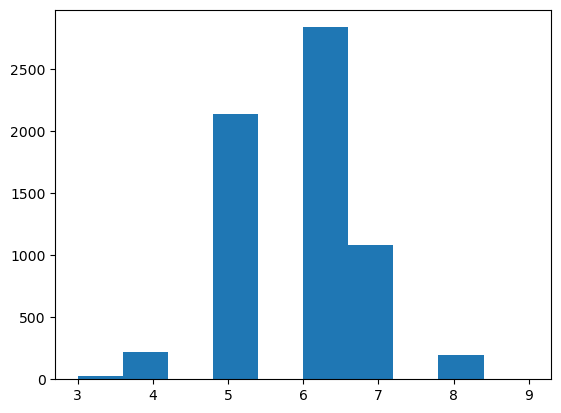

In [8]:
plt.hist(data["quality"])

In [ ]:
#We have to set range of Low quality and High quality

<AxesSubplot: >

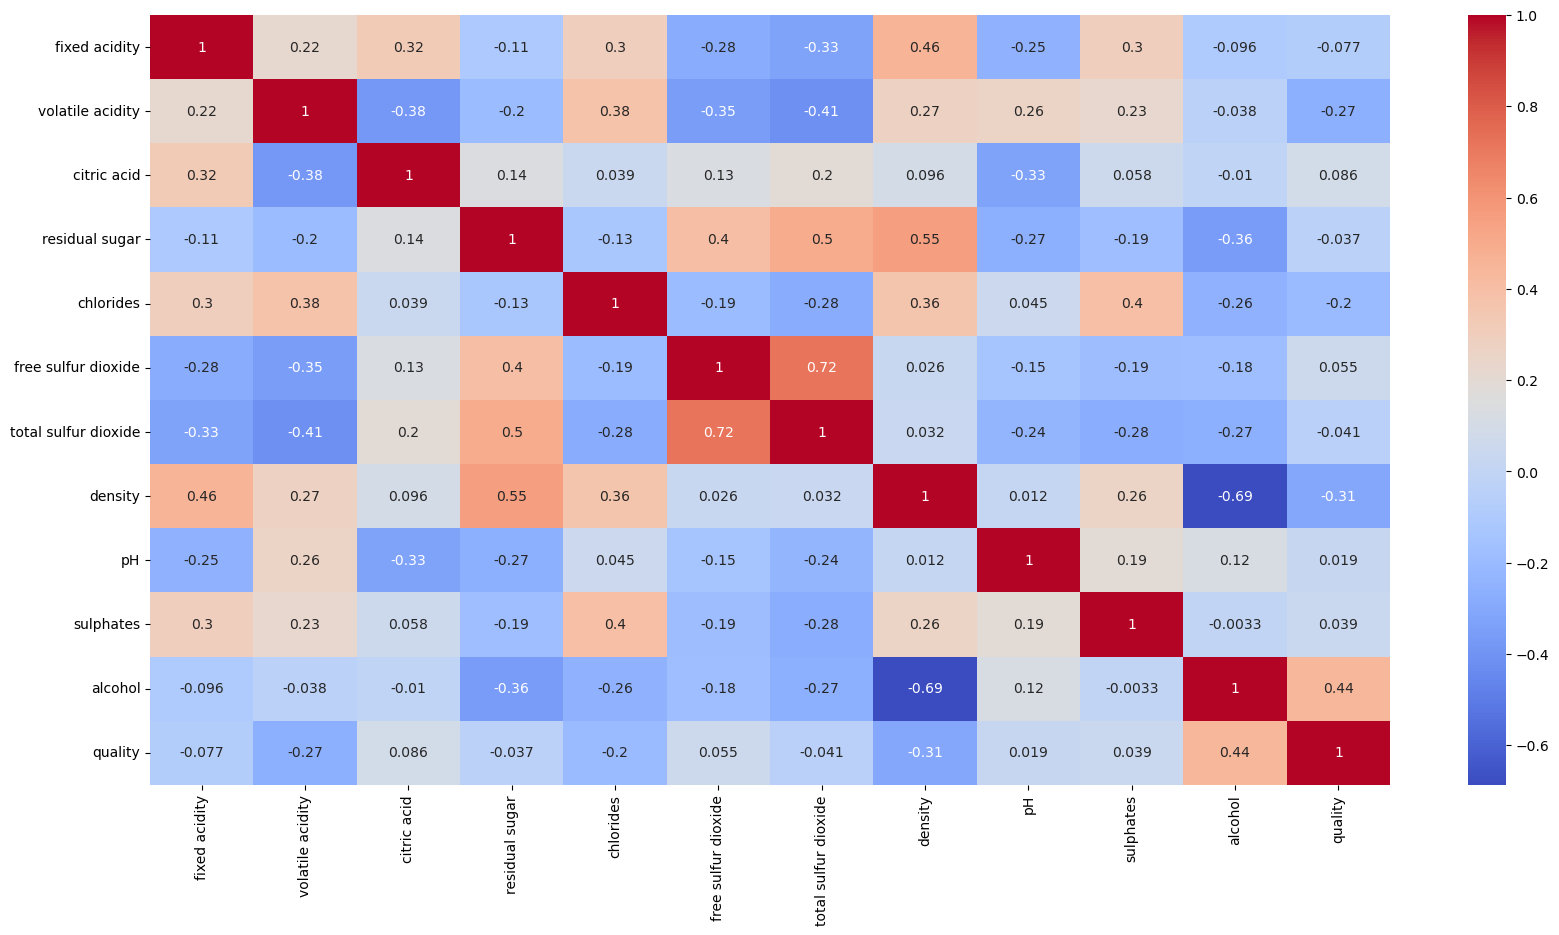

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap="coolwarm",annot=True)

In [ ]:
#Correlation of "free sulfur dioxide" and "total sulfur dioxide" so we have to drop "free sulfur dioxide"

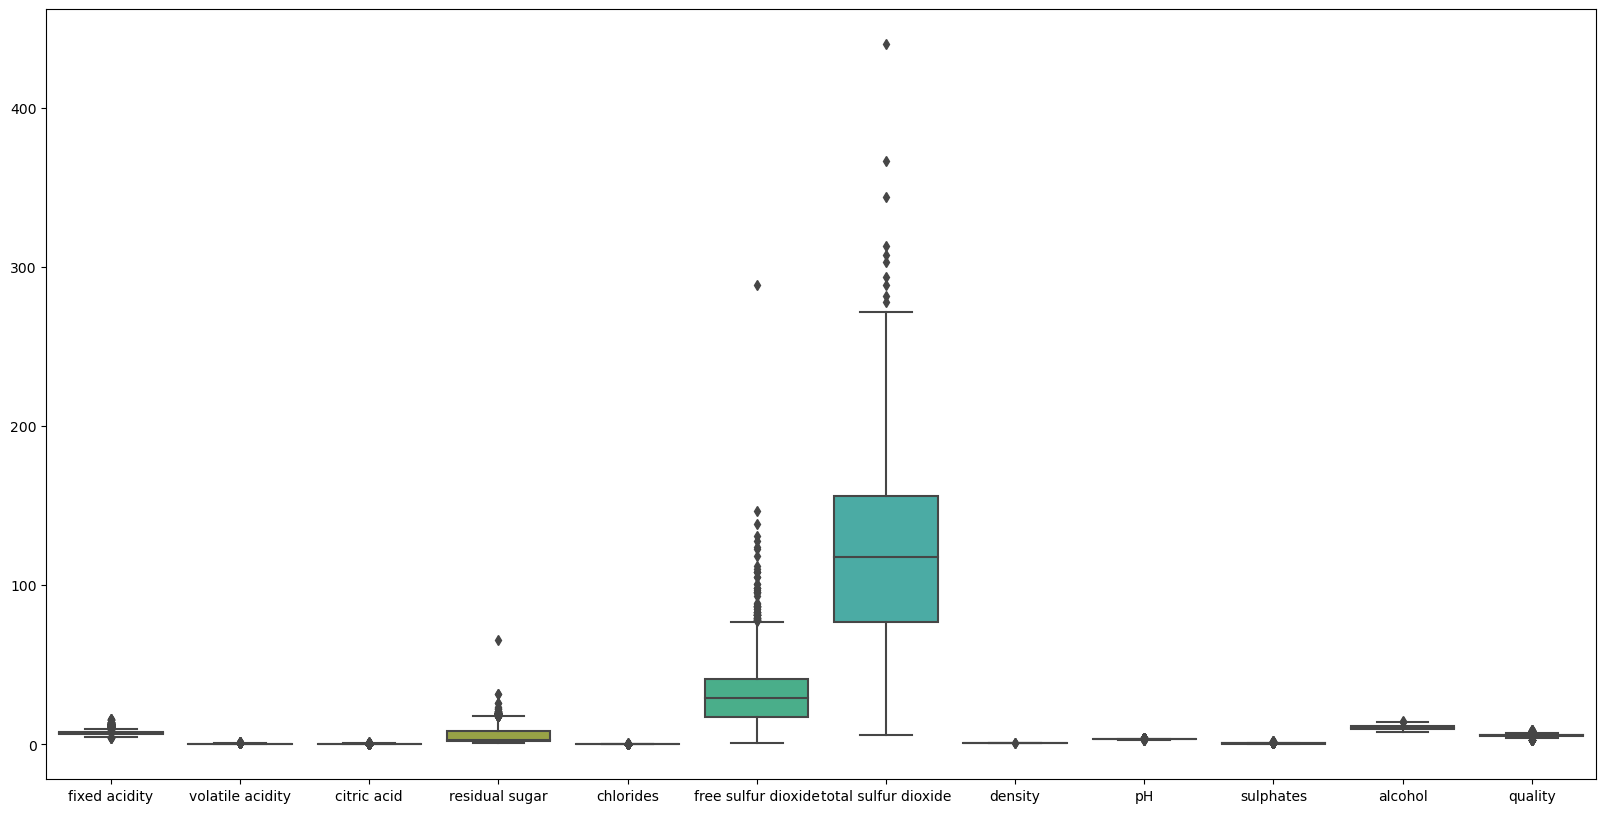

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(data)
plt.show()

In [31]:
#We will remove outliers of "total sulfur dioxide"

# Preprocessing

In [11]:
data["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [12]:
data["quality"]=[1 if x>5 else 0 for x in data["quality"]]
#0 means Low & 1 means High

In [13]:
data["quality"].value_counts()

1    4113
0    2384
Name: quality, dtype: int64

In [14]:
data.drop(["free sulfur dioxide",],axis=1,inplace=True)

In [15]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,1


In [16]:
#removing outliers

In [17]:
data["total sulfur dioxide"].describe()

count    6497.000000
mean      115.744574
std        56.521855
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

In [18]:
upper_range=data["total sulfur dioxide"].mean()+3*data["total sulfur dioxide"].std()
lower_range=data["total sulfur dioxide"].mean()-3*data["total sulfur dioxide"].std()
print("upper_range",upper_range)
print("lower_range",lower_range)

upper_range 285.31013798685353
lower_range -53.82098914892836


In [19]:
data["total sulfur dioxide"]=np.where(
    data["total sulfur dioxide"]>upper_range,
    upper_range,
    np.where(
        data["total sulfur dioxide"]<lower_range,
        lower_range,
        data["total sulfur dioxide"]
    )
)

In [20]:
data["total sulfur dioxide"].describe()

count    6497.000000
mean      115.686930
std        56.299913
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       285.310138
Name: total sulfur dioxide, dtype: float64

In [ ]:
# Splitting Train and Test Data 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 5372 to 2732
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   total sulfur dioxide  5197 non-null   float64
 6   density               5197 non-null   float64
 7   pH                    5197 non-null   float64
 8   sulphates             5197 non-null   float64
 9   alcohol               5197 non-null   float64
dtypes: float64(10)
memory usage: 446.6 KB


In [ ]:
#Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
#Testing

In [27]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [29]:
list_algo=[SVC(),DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),KNeighborsClassifier()]

In [30]:
for model in list_algo:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"The score of {model} is {model.score(X_test,y_test)*100} %")

The score of SVC() is 77.38461538461539 %
The score of DecisionTreeClassifier() is 78.46153846153847 %
The score of RandomForestClassifier() is 83.0 %
The score of LogisticRegression() is 74.46153846153845 %
The score of KNeighborsClassifier() is 76.38461538461539 %


In [35]:
#Here DecisionTreeClassifier is giving more accuracy